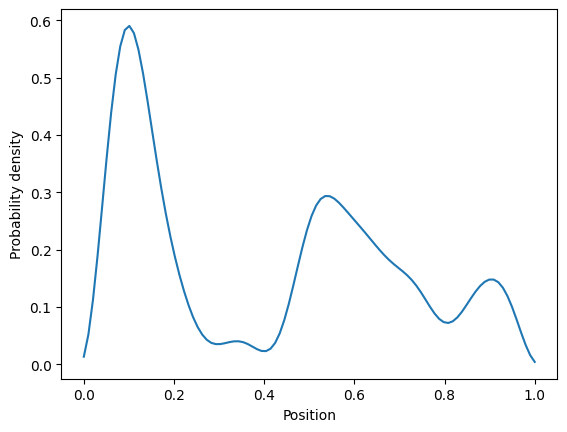

In [5]:
import numpy as np
from scipy.linalg import solve

L = 1.0  # Length of the box
N = 100  # Number of grid points
dx = L / (N - 1)  # Grid spacing
dt = 0.01  # Time step
T = 1.0  # Total simulation time

# Initialize wave function
x = np.linspace(0, L, N)
sigma = 0.1  # Width of the Gaussian wave packet
k0 = 10.0  # Wave number of the Gaussian wave packet
psi = np.exp(-(x - L/2)**2 / (2 * sigma**2)) * np.exp(1j * k0 * x)

# Construct Hamiltonian matrix
H = np.zeros((N, N), dtype=np.complex128)
H[0, 0] = 2.0 / dx**2
H[0, 1] = -1.0 / dx**2
H[-1, -1] = 2.0 / dx**2
H[-1, -2] = -1.0 / dx**2
for i in range(1, N-1):
    H[i, i] = 2.0 / dx**2
    H[i, i-1] = -1.0 / dx**2
    H[i, i+1] = -1.0 / dx**2

# Crank-Nicolson algorithm
t = 0.0
while t < T:
    # Solve linear system of equations
    A = np.eye(N) + 0.5j * dt * H
    b = np.dot(np.eye(N) - 0.5j * dt * H, psi)
    psi = solve(A, b)

    # Update time
    t += dt

# Plot the final wave function
import matplotlib.pyplot as plt
plt.plot(x, np.abs(psi)**2)
plt.xlabel('Position')
plt.ylabel('Probability density')
plt.show()


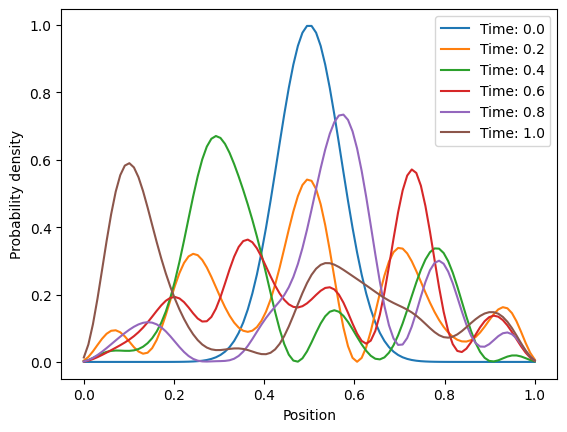

In [6]:
# Define time points
time_points = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Plot the probability for each time point
for t in time_points:
    # Reset the wave function
    psi = np.exp(-(x - L/2)**2 / (2 * sigma**2)) * np.exp(1j * k0 * x)

    # Crank-Nicolson algorithm
    current_time = 0.0
    while current_time < t:
        # Solve linear system of equations
        A = np.eye(N) + 0.5j * dt * H
        b = np.dot(np.eye(N) - 0.5j * dt * H, psi)
        psi = solve(A, b)

        # Update time
        current_time += dt

    # Plot the probability density
    plt.plot(x, np.abs(psi)**2, label=f'Time: {t}')

# Add labels and legend
plt.xlabel('Position')
plt.ylabel('Probability density')
plt.legend()

# Show the plot
plt.show()
